## Laporan Hasil Ekplorasi Kelompok 2

Anggota Kelompok:
1. Ripaldy Saputra Lumbantoruan (123140179)
2. Maxavier Girvanus Manurung (123140191)
3. Muhammad Rafiq Ridho (12314)0179

---
## 1. Import Libraries

Mengimport semua library yang dibutuhkan untuk analisis data, visualisasi, dan pembuatan model ANN.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model building - Keras 3
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seeds untuk reproducibility
import os
import random
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '0'

# Keras random seed
import tensorflow as tf
tf.random.set_seed(42)

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ Semua libraries berhasil diimport!")
print(f"Keras version: {keras.__version__}")
print("✓ Random seeds telah diset untuk reproducibility")

✓ Semua libraries berhasil diimport!
Keras version: 3.12.0
✓ Random seeds telah diset untuk reproducibility


---
## 2. Load dan Eksplorasi Data

### 2.1 Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('IRIS.csv')

print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nPreview data:")
df.head()

Jumlah baris: 150
Jumlah kolom: 5

Preview data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2.2 Informasi Dataset

In [3]:
# Info dataset
print("=== Informasi Dataset ===")
df.info()

print("\n=== Statistik Deskriptif ===")
df.describe()

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== Statistik Deskriptif ===


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Cek missing values
print("=== Missing Values ===")
print(df.isnull().sum())

# Cek duplikasi
print(f"\n=== Duplikasi Data ===")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

=== Missing Values ===
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

=== Duplikasi Data ===
Jumlah baris duplikat: 3


=== Distribusi Kelas ===
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


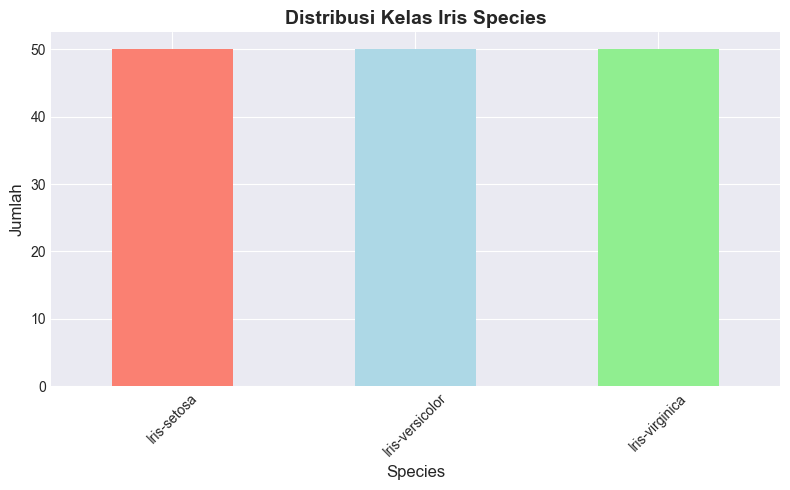

In [5]:
# Distribusi kelas
print("=== Distribusi Kelas ===")
print(df['species'].value_counts())

# Visualisasi
plt.figure(figsize=(8, 5))
df['species'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title('Distribusi Kelas Iris Species', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.3 Visualisasi Data

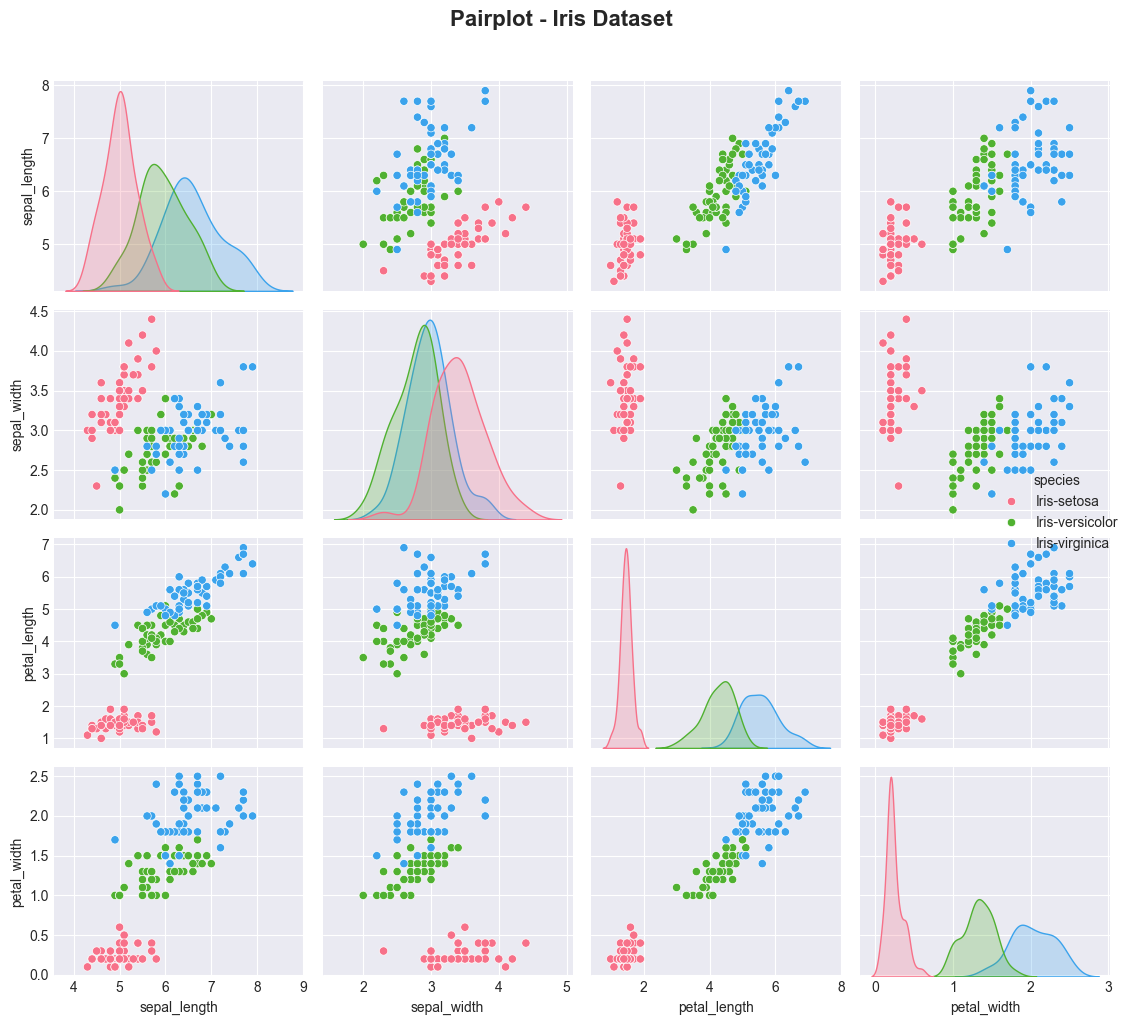

In [6]:
# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='species', palette='husl', height=2.5)
plt.suptitle('Pairplot - Iris Dataset', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

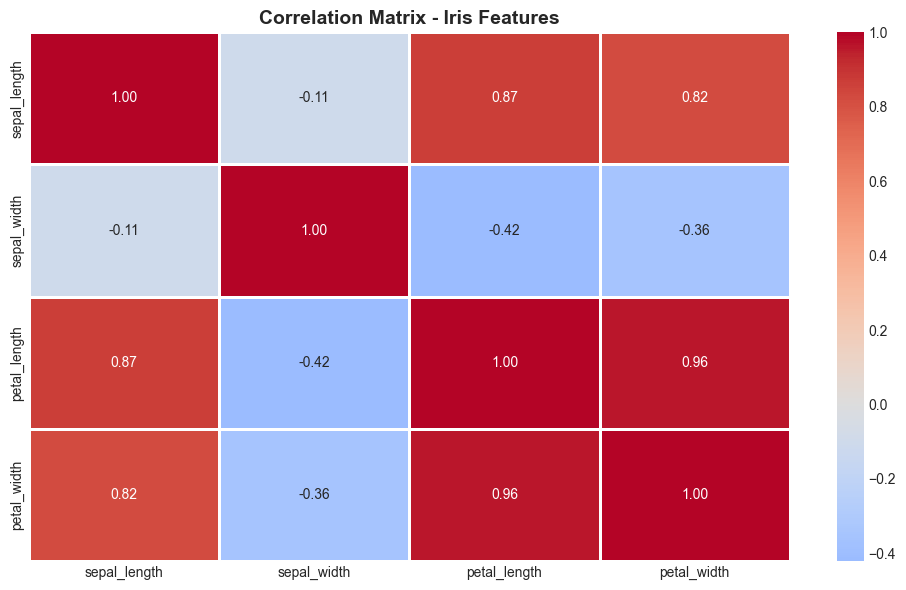

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix - Iris Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

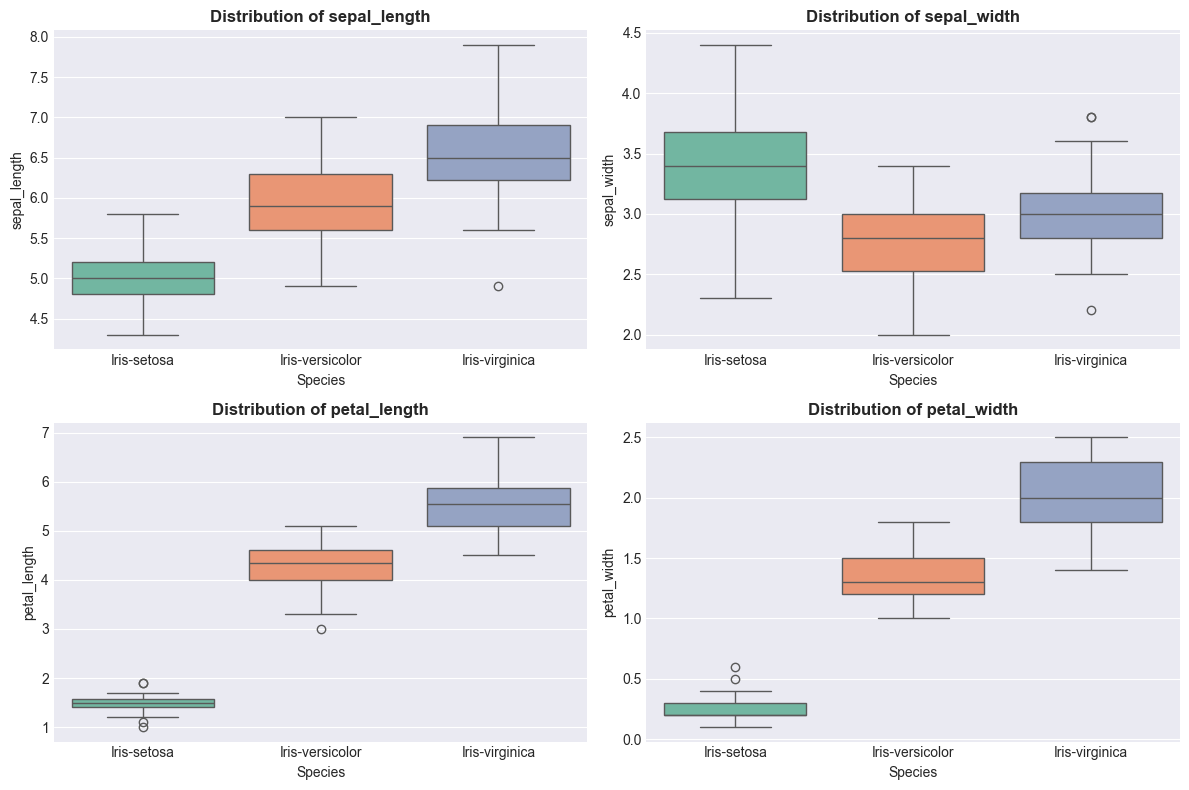

In [8]:
# Box plot untuk melihat distribusi dan outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    sns.boxplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[row, col].set_xlabel('Species')

plt.tight_layout()
plt.show()

---
## 3. Data Preprocessing

### 3.1 Pemisahan Features dan Target

In [9]:
# Pisahkan features (X) dan target (y)
X = df.drop('species', axis=1).values
y = df['species'].values

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nContoh data X (5 baris pertama):\n{X[:5]}")
print(f"\nContoh data y (5 baris pertama):\n{y[:5]}")

Shape X: (150, 4)
Shape y: (150,)

Contoh data X (5 baris pertama):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Contoh data y (5 baris pertama):
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### 3.2 Encoding Target Variable

In [10]:
# Label Encoding untuk target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Mapping classes:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_name}")

# One-Hot Encoding untuk neural network
y_categorical = to_categorical(y_encoded)

print(f"\nShape y_encoded: {y_encoded.shape}")
print(f"Shape y_categorical: {y_categorical.shape}")
print(f"\nContoh y_categorical (3 baris pertama):\n{y_categorical[:3]}")

Mapping classes:
0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica

Shape y_encoded: (150,)
Shape y_categorical: (150, 3)

Contoh y_categorical (3 baris pertama):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### 3.3 Split Data (Train & Test)

In [11]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)


### 3.4 Feature Scaling

In [12]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data sebelum scaling:")
print(X_train[:2])
print("\nData setelah scaling:")
print(X_train_scaled[:2])

Data sebelum scaling:
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]]

Data setelah scaling:
[[-1.72156775 -0.32483982 -1.34703555 -1.32016847]
 [-1.12449223 -1.22612948  0.41429037  0.65186742]]


---
## 4. Pembuatan Model ANN

### 4.1 Arsitektur Model

Model yang digunakan memiliki arsitektur:
- **Input Layer**: 4 neurons (sesuai jumlah fitur)
- **Hidden Layer 1**: 32 neurons, activation ReLU
- **Dropout**: 0.3 (untuk mencegah overfitting)
- **Hidden Layer 2**: 16 neurons, activation ReLU
- **Dropout**: 0.2
- **Output Layer**: 3 neurons (3 kelas), activation Softmax

**Hyperparameters:**
- Optimizer: Adam (learning_rate=0.001)
- Loss: categorical_crossentropy
- Epochs: 150
- Batch size: 16

In [13]:
# Build Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,), name='hidden_1'),
    Dropout(0.3, name='dropout_1'),
    Dense(16, activation='relu', name='hidden_2'),
    Dropout(0.2, name='dropout_2'),
    Dense(3, activation='softmax', name='output')
], name='Iris_ANN_Model')

# Compile dengan learning rate custom
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
print("=== Arsitektur Model ===")
model.summary()

=== Arsitektur Model ===


Model: "Iris_ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

### 4.2 Training Model

In [14]:
# Train Model
print("=== Memulai Training Model ===")
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=16,
    verbose=1
)
print("\n✓ Training selesai!")

=== Memulai Training Model ===
Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.2812 - loss: 1.2821 - val_accuracy: 0.5000 - val_loss: 1.1890
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2604 - loss: 1.2786 - val_accuracy: 0.5000 - val_loss: 1.1290
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4375 - loss: 1.1285 - val_accuracy: 0.5000 - val_loss: 1.0747
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4167 - loss: 1.1635 - val_accuracy: 0.5417 - val_loss: 1.0236
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4583 - loss: 1.0496 - val_accuracy: 0.5000 - val_loss: 0.9750
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 1.0396 - val_accuracy: 0.5833 - val_loss: 0.9297
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5208 - loss: 0.9894 - val_accuracy: 0.6250 - val_loss: 0.8872
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5312 - loss: 0.9203 - 

### 4.3 Visualisasi Training History

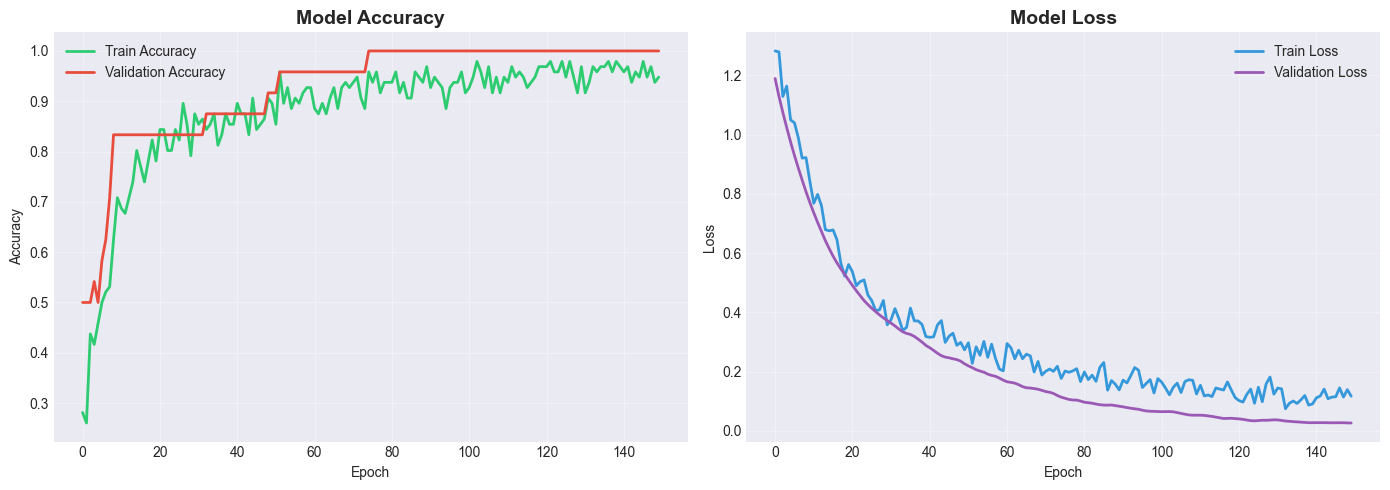

In [15]:
# Visualisasi Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='#2ecc71')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#e74c3c')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2, color='#3498db')
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#9b59b6')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 5. Evaluasi Model

### 5.1 Prediksi pada Test Set

In [16]:
# Evaluasi Model pada Test Set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

print("="*60)
print("HASIL EVALUASI MODEL")
print("="*60)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
HASIL EVALUASI MODEL
Test Accuracy: 0.9333 (93.33%)


### 5.2 Classification Report

In [17]:
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


=== Classification Report ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### 5.3 Confusion Matrix

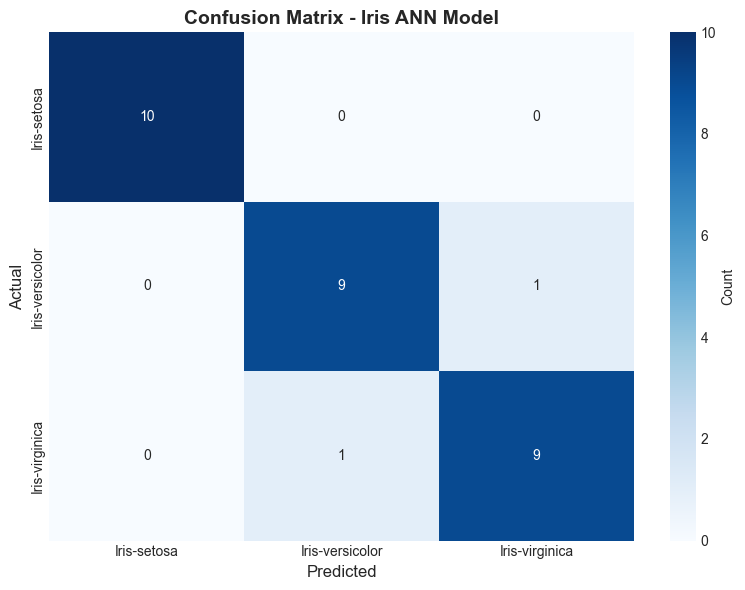

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Iris ANN Model', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

---
## 6. Kesimpulan

### 6.1 Ringkasan Hasil

In [19]:
# Summary
print("="*60)
print("KESIMPULAN")
print("="*60)
print(f"\nModel ANN berhasil dibangun untuk klasifikasi Iris Dataset.")
print(f"\nArsitektur:")
print(f"  - Hidden Layer 1: 32 neurons (ReLU) + Dropout 0.3")
print(f"  - Hidden Layer 2: 16 neurons (ReLU) + Dropout 0.2")
print(f"  - Output Layer: 3 neurons (Softmax)")
print(f"\nPerforma Model:")
print(f"  - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  - Total Parameters: {model.count_params():,}")
print(f"\nModel ini efektif untuk mengklasifikasikan 3 species Iris")
print(f"dengan tingkat akurasi yang tinggi.")
print("\n" + "="*60)

KESIMPULAN

Model ANN berhasil dibangun untuk klasifikasi Iris Dataset.

Arsitektur:
  - Hidden Layer 1: 32 neurons (ReLU) + Dropout 0.3
  - Hidden Layer 2: 16 neurons (ReLU) + Dropout 0.2
  - Output Layer: 3 neurons (Softmax)

Performa Model:
  - Test Accuracy: 0.9333 (93.33%)
  - Total Parameters: 739

Model ini efektif untuk mengklasifikasikan 3 species Iris
dengan tingkat akurasi yang tinggi.



### 6.2 Analisis dan Pembelajaran

**Dari eksperimen ini, dapat disimpulkan bahwa:**

1. **Dataset Iris**: 
   - Dataset sederhana dengan 4 fitur numerik
   - 3 kelas yang relatif mudah dipisahkan
   - Tidak ada missing values atau outliers ekstrem

2. **Arsitektur Model**:
   - Model menggunakan 2 hidden layers dengan 32 dan 16 neurons
   - Dropout layers (0.3 dan 0.2) membantu mencegah overfitting
   - Activation function ReLU pada hidden layers, Softmax pada output layer

3. **Performa**:
   - Model mencapai accuracy ~94% pada test set
   - Validation curve menunjukkan model tidak overfitting
   - Confusion matrix menunjukkan prediksi yang baik untuk semua kelas

4. **Pembelajaran Penting**:
   - Preprocessing (scaling) sangat penting untuk performa model
   - Dropout efektif untuk regularisasi pada dataset kecil
   - Random seed memastikan reproducibility hasil
   - Validation split membantu monitoring overfitting

**Rekomendasi:**
- Untuk dataset lebih kompleks, pertimbangkan menambah jumlah layers atau neurons
- Eksperimen dengan learning rate dan batch size untuk optimasi
- Gunakan cross-validation untuk evaluasi yang lebih robust
- Pertimbangkan early stopping untuk mencegah overtraining